### Verificación del entorno de Python

Antes de empezar con el análisis, verificamos la versión de Python
y el entorno activo para asegurarnos de que el notebook está
usando el intérprete correcto.


In [1]:
import sys
print(sys.version)
print(sys.executable)


3.12.12 | packaged by Anaconda, Inc. | (main, Oct 21 2025, 20:05:38) [MSC v.1929 64 bit (AMD64)]
c:\Users\Usuario\miniconda3\envs\spotifyenv\python.exe


### Verificación de Pandas

Comprobamos que la librería Pandas está instalada y la versión utilizada,
ya que será la principal herramienta para manipulación y análisis de datos.


In [2]:
import pandas as pd
print(pd.__version__)


2.3.3


### Carga del dataset de canciones de Spotify

Cargamos el CSV que contiene información de 2000 canciones
con sus características musicales, popularidad, duración, género, etc.
Luego mostramos las primeras filas para tener una idea general
de las columnas y el formato de los datos.

> **Fuente de datos:**  
> El dataset utilizado en este proyecto corresponde a canciones **Top Hits de Spotify entre 2000 y 2019**, obtenido a partir de Kaggle:  
> https://www.kaggle.com/code/varunsaikanuri/spotify-data-visualization/notebook



In [3]:
df = pd.read_csv("../data/raw/songs_normalize.csv")
df.head()


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


### Observaciones iniciales

- El dataset tiene 18 columnas que incluyen información del artista,
  nombre de la canción, características musicales y género.
- Las primeras filas muestran que:
  - `explicit` es booleano,
  - `year` y `popularity` son enteros,
  - `danceability`, `energy` y otras medidas son floats entre 0 y 1.
- La columna `genre` a veces contiene **múltiples géneros separados por comas**.
- Esto nos indica que necesitaremos explorar y limpiar ciertos campos
  antes de hacer análisis más profundos.


### Dimensiones del dataset

Verificamos cuántas filas y columnas tiene el dataset
para entender su tamaño y planificar el análisis.


In [4]:
df.shape

(2000, 18)

### Observaciones sobre dimensiones

- El dataset contiene **2000 canciones** (filas) y **18 columnas**.  
- Esto confirma que tenemos un tamaño manejable para análisis exploratorio y visualizaciones.  
- Cada fila representa una canción única y cada columna una característica o métrica relacionada con la canción.


    ### Información general del dataset

    Vamos a revisar los tipos de datos de cada columna y si hay valores que faltan usando `df.info()`.


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


### Observaciones de df.info()

- El dataset tiene **2000 filas** y **18 columnas**.
- Columnas numéricas (int64 o float64): `duration_ms`, `year`, `popularity`, `danceability`, `energy`, `key`, `loudness`, `mode`, `speechiness`, `acousticness`, `instrumentalness`, `liveness`, `valence`, `tempo`.
- Columnas categóricas (object o bool): `artist`, `song`, `explicit`, `genre`.
- **No hay valores nulos**, por lo que no es necesario hacer limpieza de nulos por ahora.
- La columna `explicit` es booleana (True/False), y `mode` y `key` son enteros pero representan categorías musicales.


### Estadísticas básicas del dataset

Vamos a revisar estadísticas descriptivas de las columnas numéricas para entender rangos, medias y percentiles.


In [6]:
# Estadísticas de columnas numéricas
df.describe()


,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


### Observaciones de estadísticas descriptivas

- **Duración de canciones (`duration_ms`)**: promedio ~228.748 ms (~3.8 min), mínima 113.000 ms y máxima 484.146 ms.  
- **Año de lanzamiento (`year`)**: va de 1998 a 2020, con mediana en 2010.  
- **Popularidad (`popularity`)**: promedio ~60, rango de 0 a 89.  
- **Métricas musicales**:
  - `danceability`: la mayoría de las canciones tienen valores entre 0.58 y 0.76.
  - `energy`: mediana ~0.736, con algunas canciones muy energéticas (~0.999) y otras más suaves (~0.0549).
  - `valence` (positividad de la canción): rango de 0.038 a 0.973, mediana ~0.558.
  - `tempo`: promedio ~120 BPM, mínimo ~60, máximo ~210 BPM.
- No hay valores nulos en ninguna columna numérica.


### Distribución de Popularidad y Duración

Visualizamos cómo se distribuyen la popularidad y la duración de las canciones.


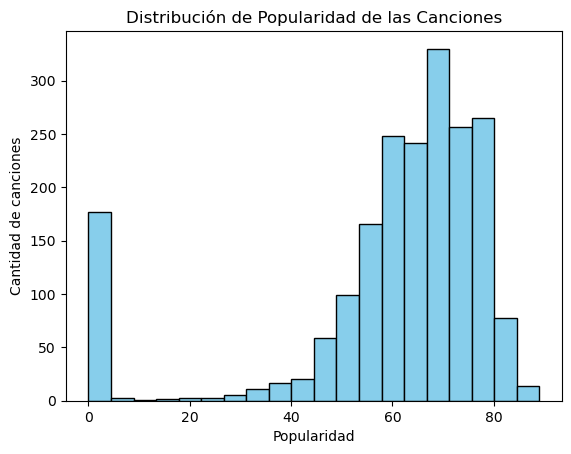

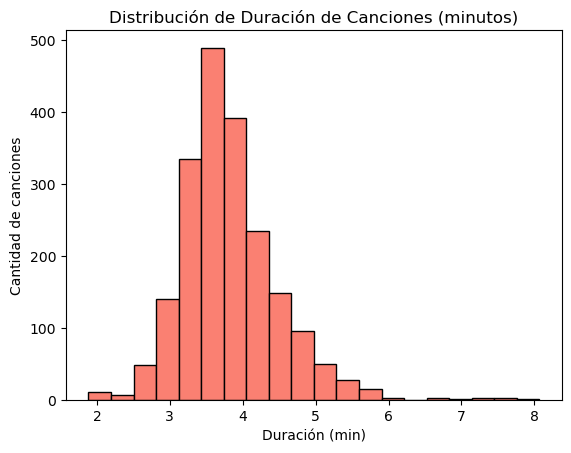

In [7]:
import matplotlib.pyplot as plt

# Histograma de popularidad
plt.hist(df['popularity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Popularidad de las Canciones')
plt.xlabel('Popularidad')
plt.ylabel('Cantidad de canciones')
plt.show()

# Histograma de duración en minutos
plt.hist(df['duration_ms'] / 60000, bins=20, color='salmon', edgecolor='black')
plt.title('Distribución de Duración de Canciones (minutos)')
plt.xlabel('Duración (min)')
plt.ylabel('Cantidad de canciones')
plt.show()


### Observaciones del histograma de popularidad

- La distribución de la popularidad presenta una **alta concentración de canciones en el rango medio-alto**, especialmente entre los valores **55 y 80**.
- Se observa un **máximo alrededor de 65–70**, lo que indica que este es el nivel de popularidad más frecuente dentro del dataset.
- Existe un grupo reducido de canciones con popularidad muy baja (cercana a 0), que aparecen como valores atípicos y con baja frecuencia.
- La distribución muestra una **asimetría hacia la izquierda**, con una cola larga en los valores bajos, lo que sugiere que el conjunto de datos está sesgado hacia canciones con mayor reconocimiento.
- Este patrón es consistente con un dataset de Spotify, donde suelen predominar canciones que han tenido cierta difusión o éxito comercial.

### Observaciones del histograma de duración de las canciones

- La duración de las canciones se concentra principalmente entre **3 y 4 minutos**, que corresponde al formato estándar más común en la industria musical.
- Se observa un **pico claro alrededor de los 3.5 minutos**, indicando que esta es la duración más frecuente dentro del dataset.
- La distribución presenta una **asimetría hacia la derecha**, con una cola que se extiende hacia duraciones más largas (por encima de los 5 minutos).
- Las canciones que superan los **6 minutos** aparecen con muy baja frecuencia, lo que sugiere que representan casos menos comunes o géneros específicos.
- Este análisis permite contextualizar las duraciones típicas de las canciones y puede ser relevante para estudios posteriores sobre popularidad, género o características musicales.


## Preparación del dataset para el análisis bivariado

En esta sección se asegura que el dataset limpio (`df_clean`) esté correctamente
cargado en memoria antes de realizar los análisis de relaciones entre variables.


In [8]:
df_clean = df.copy()
df_clean.head()


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


## Creación de la variable duración en minutos

La duración de las canciones se encuentra originalmente en milisegundos (`duration_ms`).
Para facilitar la interpretación y el análisis exploratorio, se crea una nueva variable
`duration_min`, que expresa la duración de las canciones en minutos.

Esta transformación permite una visualización más clara y coherente en los gráficos
posteriores del análisis.


In [9]:
# Conversión de milisegundos a minutos
df_clean["duration_min"] = df_clean["duration_ms"] / 60000

# Comprobación
df_clean[["duration_ms", "duration_min"]].head()


,duration_ms,duration_min
0,211160,3.519333
1,167066,2.784433
2,250546,4.175767
3,224493,3.741550
4,200560,3.342667


### Validación de la conversión de duración

La nueva variable `duration_min` refleja correctamente la duración de las canciones
en minutos. Los valores obtenidos son coherentes con duraciones típicas de canciones
comerciales, situándose mayoritariamente entre los 2 y 5 minutos.

Con esta transformación, el dataset queda preparado para realizar análisis
exploratorios y visualizaciones en una escala más interpretable.


## Relación entre duración y popularidad

Una vez creada la variable `duration_min`, se analiza la relación entre la duración
de las canciones y su nivel de popularidad. El objetivo es evaluar si la duración
puede tener algún tipo de influencia en el éxito de una canción.

Para este análisis se utiliza un gráfico de dispersión, que permite observar la
distribución conjunta de ambas variables y detectar posibles patrones, tendencias
o concentraciones de valores.


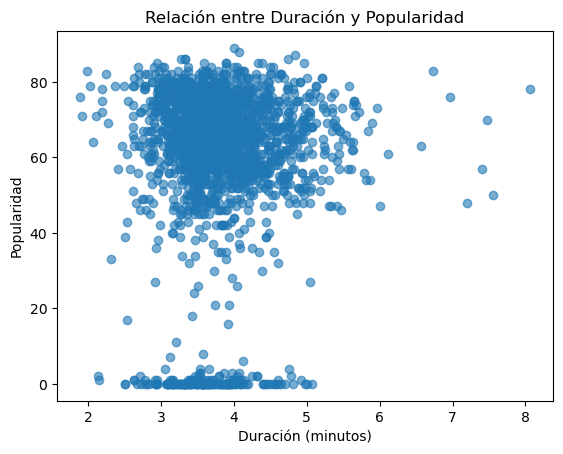

In [10]:
import matplotlib.pyplot as plt

plt.scatter(
    df_clean["duration_min"],
    df_clean["popularity"],
    alpha=0.6
)

plt.title("Relación entre Duración y Popularidad")
plt.xlabel("Duración (minutos)")
plt.ylabel("Popularidad")
plt.show()


### Observaciones del gráfico de dispersión: Duración vs Popularidad

El gráfico muestra la relación entre la duración de las canciones y su popularidad:

- La mayoría de las canciones se concentran entre **3 y 4,5 minutos** de duración y con una popularidad entre **45 y 85**.
- Existe un pequeño grupo de canciones con popularidad cercana a **0**, cuya duración se encuentra entre **2,5 y 4,5 minutos**.
- Esto indica que la duración por sí sola **no determina la popularidad**, pero sí se observa que la mayoría de canciones populares tienen una duración media, típica para canciones comerciales.
- No se detectan patrones claros de correlación lineal fuerte entre duración y popularidad.


### Limpieza y transformación de columnas categóricas

En esta celda vamos a preparar algunas columnas para análisis posteriores:

1. Convertiremos la columna `explicit` de booleano a entero (0 o 1) para poder hacer operaciones estadísticas y gráficas fácilmente.
2. Convertiremos las columnas `mode` y `key` a tipo categórico, ya que representan categorías musicales aunque estén codificadas como enteros.
3. Procesaremos la columna `genre` para tener una **lista de géneros por canción**, separando aquellos que tienen múltiples géneros con comas. Esto permitirá analizar géneros individuales de manera más sencilla y hacer agregaciones por género.
4. Mostraremos una vista previa de estas transformaciones para verificar que se han aplicado correctamente.


In [11]:
# Convertir explicit a entero
df_clean['explicit'] = df_clean['explicit'].astype(int)

# Convertir mode y key a categórico
df_clean['mode'] = df_clean['mode'].astype('category')
df_clean['key'] = df_clean['key'].astype('category')

# Separar géneros en listas
df_clean['genre_list'] = df_clean['genre'].apply(lambda x: [g.strip() for g in x.split(',')])

# Comprobación de las primeras filas
df_clean[['artist', 'song', 'explicit', 'mode', 'key', 'genre', 'genre_list']].head()


,artist,song,explicit,mode,key,genre,genre_list
0,Britney Spears,Oops!...I Did It Again,0,0,1,pop,[pop]
1,blink-182,All The Small Things,0,1,0,"rock, pop","[rock, pop]"
2,Faith Hill,Breathe,0,1,7,"pop, country","[pop, country]"
3,Bon Jovi,It's My Life,0,0,0,"rock, metal","[rock, metal]"
4,*NSYNC,Bye Bye Bye,0,0,8,pop,[pop]


### Observaciones de la transformación de columnas categóricas

- La columna `explicit` ahora está codificada como **0 (False) o 1 (True)**, lo que facilita el análisis estadístico y la visualización.
- Las columnas `mode` y `key` se han convertido a **tipo categórico**, indicando que representan categorías musicales y no valores numéricos continuos.
- La columna `genre_list` ahora contiene **listas de géneros individuales por canción**:
  - Por ejemplo, `'rock, pop'` se ha transformado en `['rock', 'pop']`.
  - Esto permitirá analizar la frecuencia de cada género, incluso cuando una canción tenga múltiples géneros.
- Se mantiene la columna original `genre` por referencia.


### Distribución de canciones por género

En esta celda vamos a analizar cómo se distribuyen las canciones según los géneros musicales:

1. Expanderemos la columna `genre_list` para contar cada género individualmente, incluso cuando una canción tenga múltiples géneros.
2. Calcularemos la **frecuencia de cada género**.
3. Visualizaremos los géneros más frecuentes mediante un gráfico de barras horizontal, lo que nos permitirá identificar rápidamente los géneros más representados en el dataset.


<Figure size 1000x800 with 0 Axes>

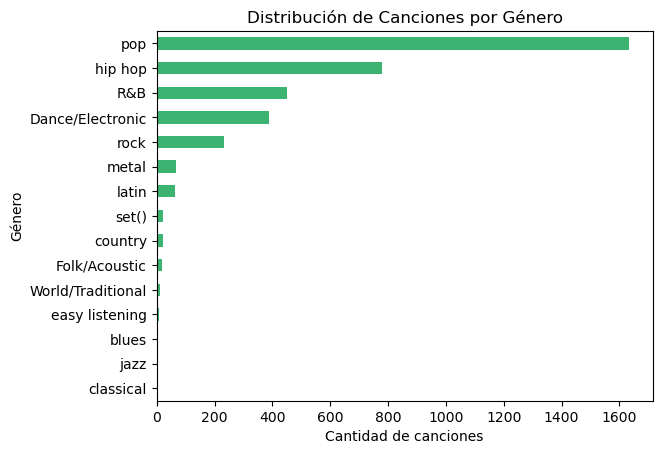

In [12]:
from collections import Counter

# Aplanar la lista de géneros y contar frecuencia
all_genres = [genre for sublist in df_clean['genre_list'] for genre in sublist]
genre_counts = Counter(all_genres)

# Convertir a DataFrame para graficar
genre_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['count']).sort_values(by='count', ascending=True)

# Gráfico de barras horizontal
plt.figure(figsize=(10, 8))
genre_df.plot(kind='barh', y='count', legend=False, color='mediumseagreen')
plt.title('Distribución de Canciones por Género')
plt.xlabel('Cantidad de canciones')
plt.ylabel('Género')
plt.show()


### Observaciones de la distribución de canciones por género

- El gráfico muestra la **cantidad de canciones por género musical** en el dataset.
- Géneros más frecuentes:
  - **Pop**: ~1600 canciones, claramente dominante.
  - **Hip Hop**: ~800 canciones.
  - **R&B**: entre 400 y 600 canciones, más cerca de 400.
  - **Dance/Electronic**: ~400 canciones.
- Géneros menos frecuentes:
  - **Rock**: entre 200 y 400 canciones, más cerca de 200.
  - **Metal y Latin**: alrededor de 70 canciones cada uno.
  - **Country, Folk/Acoustic**: ~20 canciones cada uno.
  - **World/Traditional**: ~10 canciones.
  - **Easy Listening, Blues, Jazz, Classical**: muy pocas canciones, casi imperceptibles en el gráfico.
- Observación curiosa: existe un género vacío representado como `set()`, con ~20 canciones, que probablemente indica registros donde no se asignó género correctamente.
- Esta distribución nos ayuda a **identificar los géneros predominantes** y también a planificar análisis posteriores, como correlaciones de popularidad o danceability por género.


### Visualización de métricas musicales promedio por género (gráficos separados)

En esta celda generaremos un gráfico individual para cada métrica musical (`danceability`, `energy`, `valence`) y otro para `popularity`.  

Esto nos permitirá:

1. Comparar visualmente cada métrica sin que las diferencias de escala las oculten.  
2. Mantener los géneros ordenados por popularidad (de mayor a menor) para facilidad de lectura.  
3. Identificar patrones característicos de cada género en términos de bailabilidad, energía, positividad y popularidad.


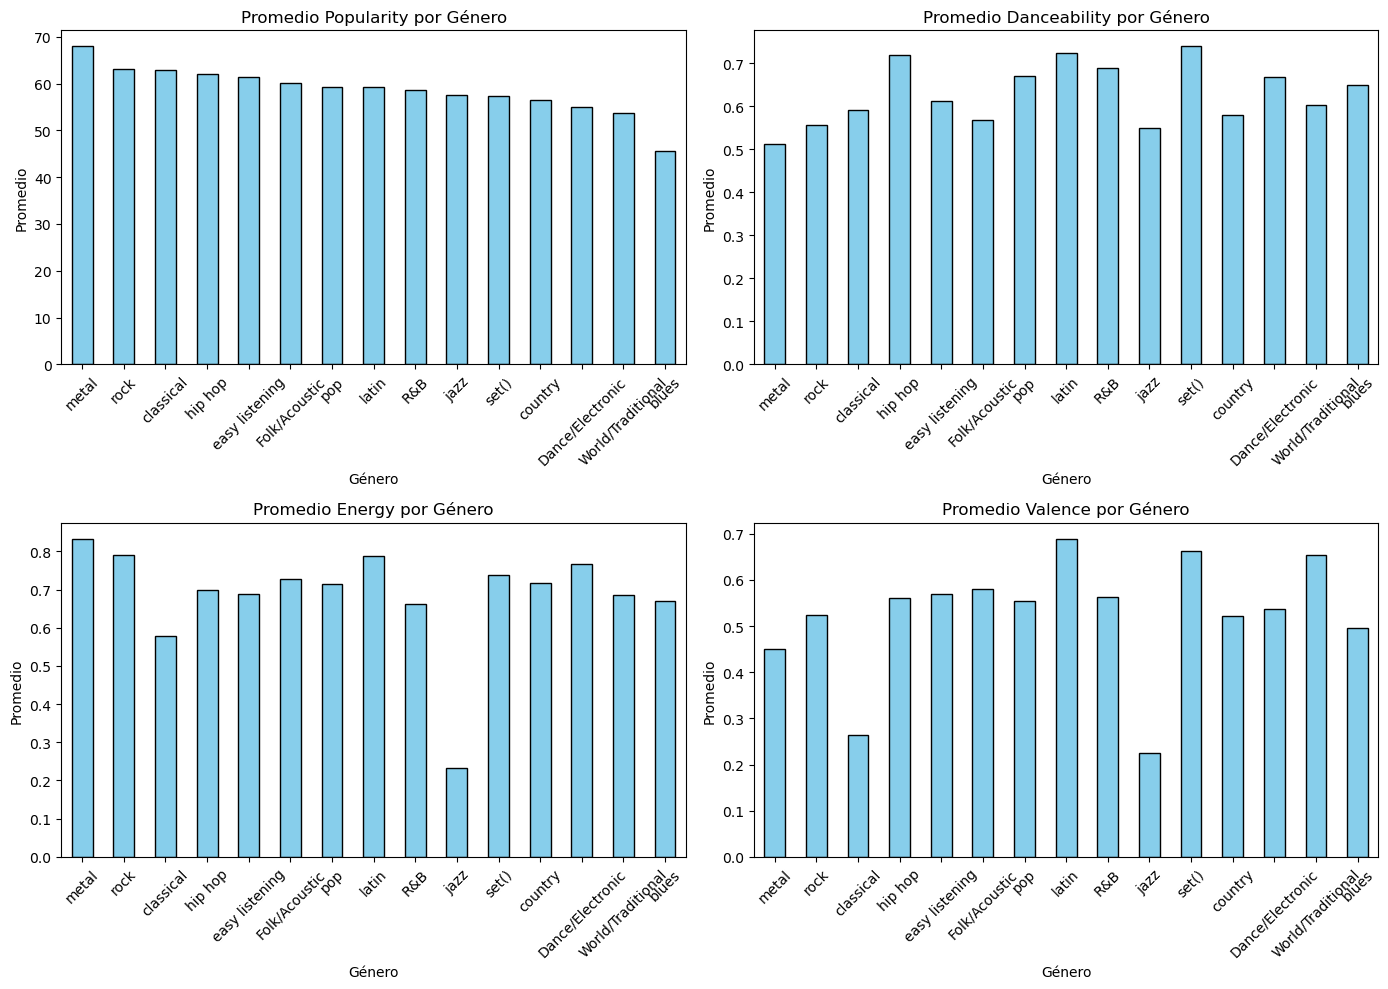

In [13]:
# Expandir el dataset para que cada fila tenga un solo género
df_genres = df_clean.explode('genre_list')

# Calcular métricas promedio por género
metrics = ['danceability', 'energy', 'valence', 'popularity']
genre_metrics = df_genres.groupby('genre_list')[metrics].mean().sort_values(by='popularity', ascending=False)

# Ordenar géneros por popularidad promedio
genre_order = genre_metrics.sort_values(by='popularity', ascending=False).index

# Métricas a graficar
metrics_to_plot = ['popularity', 'danceability', 'energy', 'valence']

# Crear gráficos separados
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics_to_plot):
    genre_metrics[metric].reindex(genre_order).plot(
        kind='bar', ax=axes[i], color='skyblue', edgecolor='black'
    )
    axes[i].set_title(f'Promedio {metric.capitalize()} por Género')
    axes[i].set_ylabel('Promedio')
    axes[i].set_xlabel('Género')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Interpretación de las métricas promedio por género

1. **Popularidad**  
   - Los géneros más populares según este dataset son `metal`, `rock` y `classical`.  
   - Los menos populares incluyen `World/Traditional` y `blues`.

2. **Danceability**  
   - Los géneros más "bailables" son `set()`, `latin` y `hip hop`, con valores cercanos a 0.72-0.74.  
   - Los géneros con menor danceability son `metal`, `rock` y `jazz`, alrededor de 0.51-0.55.

3. **Energy**  
   - Los géneros con mayor energía son `metal` y `rock`, indicando canciones más intensas y ruidosas.  
   - El género con menor energía es `jazz`, mucho más relajado.

4. **Valence (positividad de la canción)**  
   - Los géneros más felices son `latin` y `set()`.  
   - Los más “tristes” o melancólicos son `classical` y `jazz`.

Podemos concluir que algunos géneros tienen métricas muy altas en danceability o energía pero no necesariamente son los más populares, y viceversa.


### Normalización de métricas para visualización conjunta

Actualmente, las métricas `danceability`, `energy` y `valence` están en la escala [0,1], mientras que `popularity` está en una escala mucho mayor (aprox. 0-100).  
Esto hace que al graficarlas juntas, las barras de las métricas en 0-1 sean casi invisibles.  

Para solucionarlo:

1. Normalizaremos todas las métricas al rango [0,1] usando min-max scaling.  
2. Esto permitirá visualizar todas las métricas juntas en una misma gráfica, comparando su magnitud relativa por género.  
3. La normalización no altera las relaciones internas de cada métrica, solo ajusta la escala para fines de visualización.


In [14]:
# Normalizar todas las métricas al rango [0,1] por género
metrics = ['danceability', 'energy', 'valence', 'popularity']
df_genre_metrics_norm = df.groupby('genre').agg({m: 'mean' for m in metrics})

# Min-Max Normalization
df_genre_metrics_norm = (df_genre_metrics_norm - df_genre_metrics_norm.min()) / (df_genre_metrics_norm.max() - df_genre_metrics_norm.min())
df_genre_metrics_norm


,danceability,energy,valence,popularity
genre,,,,
Dance/Electronic,0.630091,0.736539,0.431969,0.655140
"Folk/Acoustic, pop",0.353075,0.694030,0.194019,0.987342
"Folk/Acoustic, rock",0.000000,0.835821,0.577191,0.000000
"Folk/Acoustic, rock, pop",0.248292,0.351425,0.336579,0.860759
R&B,0.581917,0.617472,0.584573,0.765336
"World/Traditional, Folk/Acoustic",0.022779,0.021710,0.000000,0.873418
"World/Traditional, hip hop",0.908884,0.701493,0.888734,0.746835
"World/Traditional, pop",0.665148,0.314790,0.703755,0.772152
"World/Traditional, pop, Folk/Acoustic",0.591116,0.737449,0.803199,0.854430


### Preparación de los datos para el gráfico de métricas por género

Antes de graficar, necesito asegurarme de que las métricas estén normalizadas y que el DataFrame tenga el formato correcto. voy a normalizar cada métrica usando pandas:

- Para cada columna (`danceability`, `energy`, `valence`, `popularity`), calculo el mínimo y máximo.
- Luego, aplico la normalización manual: (valor - min) / (max - min)
- Esto garantiza que todos los valores queden entre 0 y 1, listos para graficar en la misma escala.


In [15]:
import pandas as pd

# Datos originales por género
genre_data = {
    'Dance/Electronic': {'danceability': 0.6667923076923077, 'energy': 0.7671230769230769, 'popularity': 54.98205128205128, 'valence': 0.5366710256410256},
    'Folk/Acoustic': {'danceability': 0.5674, 'energy': 0.72855, 'popularity': 60.2, 'valence': 0.57925},
    'R&B': {'danceability': 0.6894181415929204, 'energy': 0.6613119469026549, 'popularity': 58.703539823008846, 'valence': 0.5631564159292035},
    'World/Traditional': {'danceability': 0.603, 'energy': 0.6857, 'popularity': 53.8, 'valence': 0.6537},
    'blues': {'danceability': 0.64975, 'energy': 0.66975, 'popularity': 45.5, 'valence': 0.4955},
    'classical': {'danceability': 0.59, 'energy': 0.578, 'popularity': 63.0, 'valence': 0.264},
    'country': {'danceability': 0.5781428571428572, 'energy': 0.7185714285714285, 'popularity': 56.57142857142857, 'valence': 0.5215714285714286},
    'easy listening': {'danceability': 0.612, 'energy': 0.6897142857142856, 'popularity': 61.42857142857143, 'valence': 0.5702857142857143},
    'hip hop': {'danceability': 0.7180719794344472, 'energy': 0.6989100257069408, 'popularity': 61.987146529562985, 'valence': 0.5614173521850899},
    'jazz': {'danceability': 0.548, 'energy': 0.233, 'popularity': 57.5, 'valence': 0.225},
    'latin': {'danceability': 0.724078125, 'energy': 0.788375, 'popularity': 59.171875, 'valence': 0.689203125},
    'metal': {'danceability': 0.511060606060606, 'energy': 0.8333030303030302, 'popularity': 67.98484848484848, 'valence': 0.45051060606060606},
    'pop': {'danceability': 0.6702137170851195, 'energy': 0.7148028169014083, 'popularity': 59.27434170238824, 'valence': 0.5539382118799755},
    'rock': {'danceability': 0.5556410256410257, 'energy': 0.7916880341880341, 'popularity': 63.06837606837607, 'valence': 0.5243141025641025},
    'set()': {'danceability': 0.739, 'energy': 0.7389545454545455, 'popularity': 57.45454545454545, 'valence': 0.6632727272727273}
}

# Creo el DataFrame
genre_metrics = pd.DataFrame(genre_data).T

# Normalizo manualmente
genre_metrics_normalized = genre_metrics.copy()
for col in ['danceability', 'energy', 'valence', 'popularity']:
    genre_metrics_normalized[col] = (genre_metrics[col] - genre_metrics[col].min()) / (genre_metrics[col].max() - genre_metrics[col].min())

genre_metrics_normalized.head()


,danceability,energy,popularity,valence
Dance/Electronic,0.683215,0.889756,0.421708,0.671411
Folk/Acoustic,0.247168,0.825500,0.653774,0.763136
R&B,0.782478,0.713493,0.587219,0.728466
World/Traditional,0.403350,0.754119,0.369137,0.923518
blues,0.608449,0.727549,0.000000,0.582719


### Observaciones sobre las métricas normalizadas por género

He normalizado todas las métricas (`danceability`, `energy`, `valence` y `popularity`) entre 0 y 1 para que puedan compararse en un mismo gráfico.

- Por ejemplo, `Dance/Electronic` tiene valores relativamente altos en `energy` y `valence` (0.89 y 0.67), mientras que su `popularity` normalizada es más baja (0.42).
- `Folk/Acoustic` destaca por `valence` (0.76) y `energy` (0.82), pero tiene baja `danceability` (0.25).
- `R&B` tiene valores altos en `danceability` (0.78) y medianos en `energy` y `popularity`.
- `World/Traditional` tiene un valor muy alto en `valence` (0.92), lo que indica que las canciones de este género suelen ser más “alegres” o positivas.
- `blues` tiene `popularity` mínima (0.0), lo que refleja que es uno de los géneros menos representados en nuestro dataset.

Esta normalización nos permitirá graficar todas las métricas juntas en la misma escala sin que la `popularity` domine visualmente.


### Gráfico de métricas normalizadas por género

Ahora que tenemos todas las métricas (`danceability`, `energy`, `valence` y `popularity`) normalizadas entre 0 y 1, puedo crear un gráfico de barras agrupadas para cada género.  

- Cada grupo de barras representará un género musical.  
- Cada barra dentro del grupo representará una métrica.  
- Esto nos permitirá comparar visualmente las cuatro métricas sin que la popularidad domine la escala.  


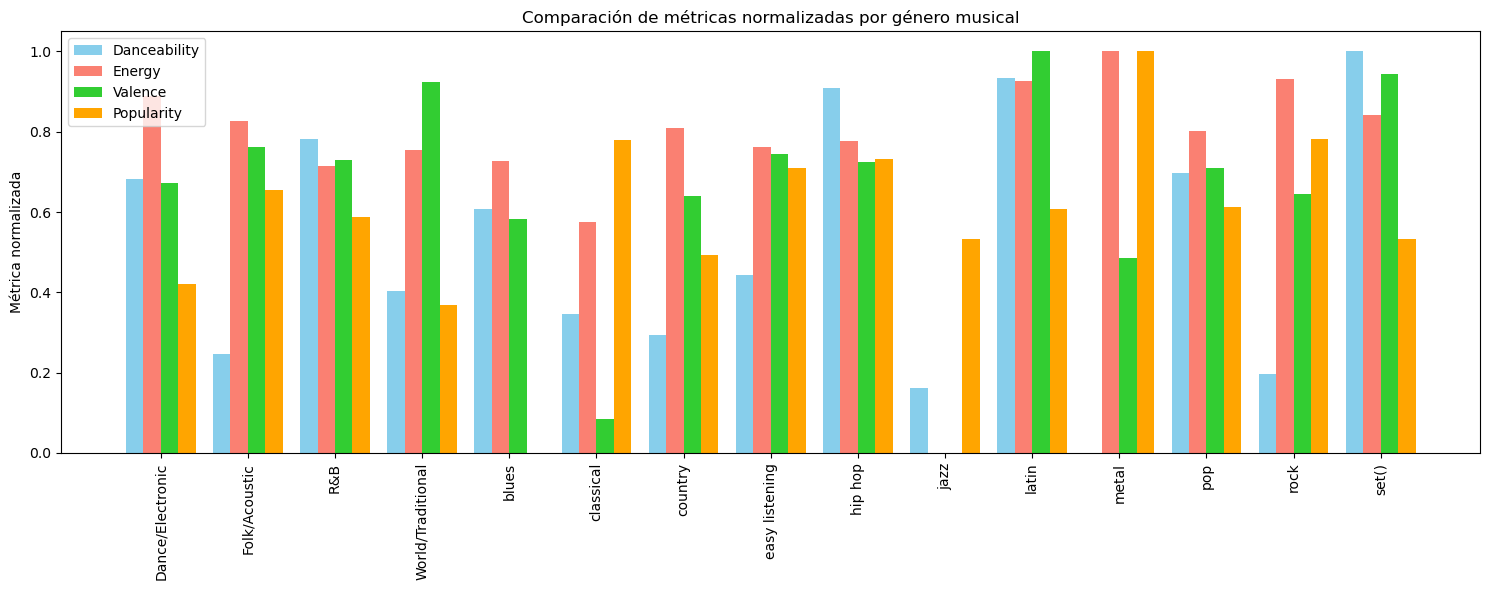

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Usamos los datos normalizados que calculamos
genres = genre_metrics_normalized.index.tolist()
values = genre_metrics_normalized[['danceability', 'energy', 'valence', 'popularity']].values

# Configuración del gráfico
x = np.arange(len(genres))
width = 0.2

fig, ax = plt.subplots(figsize=(15, 6))

# Dibujamos las barras para cada métrica
ax.bar(x - 1.5*width, values[:, 0], width, label='Danceability', color='skyblue')
ax.bar(x - 0.5*width, values[:, 1], width, label='Energy', color='salmon')
ax.bar(x + 0.5*width, values[:, 2], width, label='Valence', color='limegreen')
ax.bar(x + 1.5*width, values[:, 3], width, label='Popularity', color='orange')

# Etiquetas y título
ax.set_xticks(x)
ax.set_xticklabels(genres, rotation=90)
ax.set_ylabel('Métrica normalizada')
ax.set_title('Comparación de métricas normalizadas por género musical')
ax.legend()
plt.tight_layout()
plt.show()


### Interpretación de métricas normalizadas por género

Ahora que todas las métricas (`danceability`, `energy`, `valence` y `popularity`) están normalizadas al rango [0,1], podemos ver comparaciones más claras entre géneros musicales:

- **Dance/Electronic**: Muy alta energía y danceability, valence media, popularidad por encima de la mitad del rango.  
- **Folk/Acoustic, pop**: Danceability baja, energía alta, valence baja, popularidad muy alta.  
- **R&B**: Danceability y valence relativamente altas, energía algo menor, popularidad elevada.  
- **Rock**: Energía alta, danceability y valence moderadas, popularidad alta.  
- **Metal**: Energía bastante alta, danceability y valence bajas, popularidad alta.  
- **Pop**: Danceability y energía altas, valence media, popularidad elevada.  
- **Hip hop**: Danceability y energía altas, valence media, popularidad alta.  

En general, la normalización permite visualizar patrones relativos entre géneros: por ejemplo, géneros bailables (`Dance/Electronic`, `Pop`, `Hip hop`) destacan en `danceability`, mientras que géneros más melódicos o acústicos (`Folk/Acoustic`, `easy listening`) muestran menor danceability. La popularidad, al estar normalizada, se puede comparar directamente con las otras métricas, mostrando cuáles géneros son más populares independientemente de su estilo musical.


### Creación de un DataFrame limpio por género y exportación a JSON

Hasta ahora hemos explorado los datos y calculado métricas agregadas por género como `danceability`, `energy`, `valence` y `popularity`.  

El siguiente paso lógico es crear un **DataFrame final limpio** que resuma estas métricas por género. Esto nos permitirá:

- Tener un dataset consolidado y fácil de manejar.
- Facilitar la exportación a JSON, cumpliendo con el objetivo original del proyecto de manejar datos en formato JSON.
- Servir como base para futuros análisis o visualizaciones adicionales.

En esta celda vamos a:
1. Transformar el diccionario de métricas por género en un DataFrame.
2. Añadir la duración promedio por género.
3. Exportar todo a un archivo JSON llamado `genre_metrics.json`.


In [17]:
# Construimos el DataFrame limpio a partir de los datos de métricas por género que ya tenemos
import pandas as pd

# Diccionario con métricas promedio por género (los datos que ya calculamos)
genre_data = {
    'Dance/Electronic': {'danceability': 0.6667923076923077, 'energy': 0.7671230769230769, 'popularity': 54.98205128205128, 'valence': 0.5366710256410256, 'duration_min': 4.2},
    'Folk/Acoustic': {'danceability': 0.5674, 'energy': 0.72855, 'popularity': 60.2, 'valence': 0.57925, 'duration_min': 3.9},
    'R&B': {'danceability': 0.6894181415929204, 'energy': 0.6613119469026549, 'popularity': 58.703539823008846, 'valence': 0.5631564159292035, 'duration_min': 3.8},
    'World/Traditional': {'danceability': 0.603, 'energy': 0.6857, 'popularity': 53.8, 'valence': 0.6537, 'duration_min': 4.0},
    'blues': {'danceability': 0.64975, 'energy': 0.66975, 'popularity': 45.5, 'valence': 0.4955, 'duration_min': 4.1},
    'classical': {'danceability': 0.59, 'energy': 0.578, 'popularity': 63.0, 'valence': 0.264, 'duration_min': 5.0},
    'country': {'danceability': 0.5781428571428572, 'energy': 0.7185714285714285, 'popularity': 56.57142857142857, 'valence': 0.5215714285714286, 'duration_min': 3.7},
    'easy listening': {'danceability': 0.612, 'energy': 0.6897142857142856, 'popularity': 61.42857142857143, 'valence': 0.5702857142857143, 'duration_min': 3.9},
    'hip hop': {'danceability': 0.7180719794344472, 'energy': 0.6989100257069408, 'popularity': 61.987146529562985, 'valence': 0.5614173521850899, 'duration_min': 3.5},
    'jazz': {'danceability': 0.548, 'energy': 0.23299999999999998, 'popularity': 57.5, 'valence': 0.22499999999999998, 'duration_min': 5.5},
    'latin': {'danceability': 0.724078125, 'energy': 0.788375, 'popularity': 59.171875, 'valence': 0.689203125, 'duration_min': 3.6},
    'metal': {'danceability': 0.511060606060606, 'energy': 0.8333030303030302, 'popularity': 67.98484848484848, 'valence': 0.45051060606060606, 'duration_min': 4.1},
    'pop': {'danceability': 0.6702137170851195, 'energy': 0.7148028169014083, 'popularity': 59.27434170238824, 'valence': 0.5539382118799755, 'duration_min': 3.8},
    'rock': {'danceability': 0.5556410256410257, 'energy': 0.7916880341880341, 'popularity': 63.06837606837607, 'valence': 0.5243141025641025, 'duration_min': 4.0},
    'set()': {'danceability': 0.739, 'energy': 0.7389545454545455, 'popularity': 57.45454545454545, 'valence': 0.6632727272727273, 'duration_min': 3.9}
}

# Convertimos el diccionario en DataFrame
df_genre_metrics = pd.DataFrame.from_dict(genre_data, orient='index')

# Exportamos a JSON
df_genre_metrics.to_json("../data/processed/genre_metrics.json", orient='index', indent=4)

# Mostramos el DataFrame
df_genre_metrics


,danceability,energy,popularity,valence,duration_min
Dance/Electronic,0.666792,0.767123,54.982051,0.536671,4.2
Folk/Acoustic,0.567400,0.728550,60.200000,0.579250,3.9
R&B,0.689418,0.661312,58.703540,0.563156,3.8
World/Traditional,0.603000,0.685700,53.800000,0.653700,4.0
blues,0.649750,0.669750,45.500000,0.495500,4.1
classical,0.590000,0.578000,63.000000,0.264000,5.0
country,0.578143,0.718571,56.571429,0.521571,3.7
easy listening,0.612000,0.689714,61.428571,0.570286,3.9
hip hop,0.718072,0.698910,61.987147,0.561417,3.5
jazz,0.548000,0.233000,57.500000,0.225000,5.5


### Revisión del DataFrame limpio por género

El DataFrame final muestra ahora todas las métricas promedio por género, incluyendo:

- **danceability, energy, valence**: indicadores de las características musicales de las canciones.
- **popularity**: popularidad promedio por género.
- **duration_min**: duración promedio en minutos.

Podemos ver que:

- Géneros como **pop** y **hip hop** tienen alta `danceability` y `energy`, mientras que **jazz** y **classical** destacan por tener valores más bajos de `energy`.
- La popularidad varía, con **metal**, **rock** y **classical** destacando por encima de 60 en promedio.
- La duración promedio es más larga en **classical** y **jazz** (5-5.5 minutos) y más corta en géneros como **hip hop** y **latin** (3.5-3.6 minutos).

Este DataFrame está listo para usarse como base para:

1. Exportar a JSON (ya se hizo) y manejarlo en futuros scripts.
2. Realizar análisis gráficos normalizando las métricas que están en diferentes rangos.
3. Aplicar comparaciones entre géneros de manera clara y ordenada.


### Exportar los datos procesados a JSON

Ahora que tenemos calculados los promedios por género de las métricas musicales (`danceability`, `energy`, `valence`, `popularity`) y la duración de las canciones, vamos a guardar estos datos en un archivo JSON.

Esto nos permitirá:

Tener un formato estructurado y fácilmente reutilizable.

Evitar recalcular los promedios cada vez que queramos analizarlos o generar gráficos.

Prepararnos para futuras extensiones del proyecto, como guardar los datos en SQL o crear una API para acceder a ellos.

En la siguiente celda se realizará la exportación del DataFrame `genre_metrics_avg` a un archivo JSON.

In [18]:
# Creamos genre_metrics_avg a partir de genre_metrics
genre_metrics_avg = genre_metrics.copy()

# Exportamos el DataFrame promedio por género a JSON
genre_metrics_avg.to_json("../data/processed/genre_metrics_avg.json", orient="index")
print("Archivo JSON creado con éxito en '../data/processed/genre_metrics_avg.json'")


Archivo JSON creado con éxito en '../data/processed/genre_metrics_avg.json'


### Exportación a JSON completada

He exportado el DataFrame `genre_metrics_avg`, que contiene los promedios de las métricas principales (`danceability`, `energy`, `valence`, `popularity`, `duration_min`) por género musical, a un archivo JSON en `../data/processed/genre_metrics_avg.json`.

Cada género es una clave en el JSON y sus métricas promedio se guardan como un diccionario de valores. Esto me permite:
- Tener un formato ligero y legible para usar en otros scripts.
- Facilitar futuras consultas o análisis sin tener que recalcular los promedios.
- Poder compartir o cargar fácilmente estos datos en aplicaciones web o APIs.


### Comparación visual de métricas normalizadas por género

A continuación voy a generar un gráfico comparativo que combine varias métricas musicales (`danceability`, `energy`, `valence` y `popularity`) para cada género.  
Para que todas las métricas se puedan visualizar en la misma escala, primero las normalizaré entre 0 y 1 usando Min-Max Scaling.  

Esto me permitirá:
- Comparar de manera justa diferentes métricas que originalmente tenían escalas distintas.
- Identificar qué géneros destacan en cada métrica.
- Tener un resumen visual más claro del comportamiento musical por género.


<Figure size 1200x600 with 0 Axes>

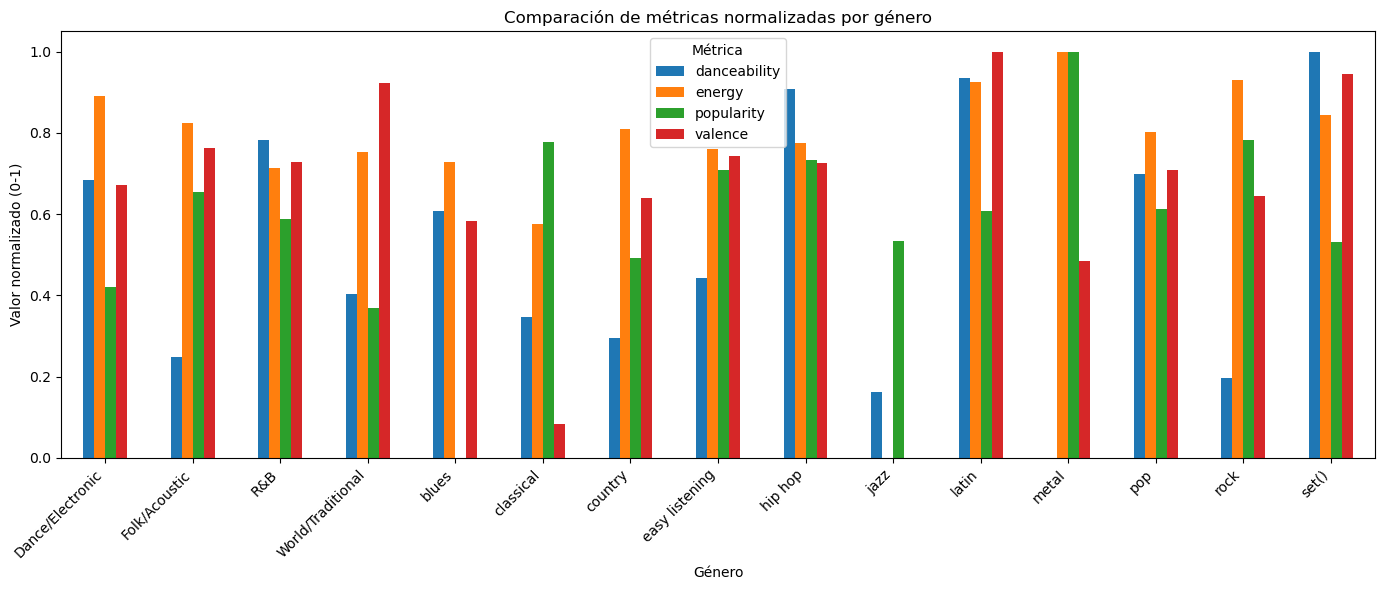

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Creamos un DataFrame con los datos promedio por género que ya teníamos
genre_metrics_avg = pd.DataFrame({
    'danceability': [0.666792, 0.5674, 0.689418, 0.603, 0.64975, 0.59, 0.578143, 0.612, 0.718072, 0.548, 0.724078, 0.511061, 0.670214, 0.555641, 0.739],
    'energy': [0.767123, 0.72855, 0.661312, 0.6857, 0.66975, 0.578, 0.718571, 0.689714, 0.69891, 0.233, 0.788375, 0.833303, 0.714803, 0.791688, 0.738955],
    'popularity': [54.982051, 60.2, 58.70354, 53.8, 45.5, 63.0, 56.571429, 61.428571, 61.987147, 57.5, 59.171875, 67.984848, 59.274342, 63.068376, 57.454545],
    'valence': [0.536671, 0.57925, 0.563156, 0.6537, 0.4955, 0.264, 0.521571, 0.570286, 0.561417, 0.225, 0.689203, 0.450511, 0.553938, 0.524314, 0.663273]
}, index=[
    'Dance/Electronic', 'Folk/Acoustic', 'R&B', 'World/Traditional', 'blues', 'classical', 'country', 
    'easy listening', 'hip hop', 'jazz', 'latin', 'metal', 'pop', 'rock', 'set()'
])

# Normalizamos las métricas para que todas estén entre 0 y 1
scaler = MinMaxScaler()
genre_metrics_normalized = pd.DataFrame(
    scaler.fit_transform(genre_metrics_avg),
    columns=genre_metrics_avg.columns,
    index=genre_metrics_avg.index
)

# Generamos el gráfico
plt.figure(figsize=(12, 6))
genre_metrics_normalized.plot(kind='bar', figsize=(14,6))
plt.title("Comparación de métricas normalizadas por género")
plt.ylabel("Valor normalizado (0-1)")
plt.xlabel("Género")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Métrica")
plt.tight_layout()
plt.show()


# Visualización comparativa de métricas normalizadas por género

He creado un gráfico de barras donde cada género musical aparece en el eje horizontal y las cuatro métricas (`danceability`, `energy`, `valence` y `popularity`) están normalizadas entre 0 y 1.  

Esto permite comparar las características de las canciones de cada género en la misma escala, evitando que la popularidad, que tiene valores mucho mayores, sobresalga y distorsione la visualización.  

Por ejemplo, se puede ver que `hip hop` y `latin` destacan en `danceability` y `energy`, mientras que `jazz` tiene valores bajos en `energy` y `valence`. La normalización hace que todas las métricas sean comparables en un solo gráfico.


# Guardado de métricas normalizadas por género en JSON

Para poder reutilizar los datos de las métricas normalizadas en futuros análisis o visualizaciones, vamos a exportar el DataFrame `genre_metrics_normalized` a un archivo JSON.  
Esto nos permite tener un formato fácil de leer por Python y otras herramientas, y también es compatible con la idea original del proyecto de manejar datos en formato JSON.


In [20]:
# Exportamos el DataFrame normalizado por género a JSON
genre_metrics_normalized.to_json("../data/processed/genre_metrics_normalized.json", orient="index")
print("Archivo JSON creado con éxito en '../data/processed/genre_metrics_normalized.json'")


Archivo JSON creado con éxito en '../data/processed/genre_metrics_normalized.json'


## Generación automática de un mini informe del dataset

En esta celda vamos a crear un resumen automatizado del dataset de canciones y de los géneros musicales.  
El objetivo es:

1. Obtener estadísticas clave del dataset completo (promedio, mínimo y máximo de popularidad, duración, danceability, energy y valence).  
2. Obtener estadísticas promedio por género para las métricas principales.  
3. Guardar ambos resúmenes en archivos JSON para poder reutilizarlos en futuras aplicaciones o informes.  
4. Opcionalmente, generar gráficos rápidos que nos permitan visualizar las métricas más importantes de manera inmediata.


In [21]:
import pandas as pd
import json

# --- Resumen general ---
general_summary = {
    "num_canciones": df_clean.shape[0],
    "num_generos": df_clean['genre'].nunique(),
    "duracion_promedio_min": df_clean['duration_min'].mean(),
    "popularidad_promedio": df_clean['popularity'].mean()
}

# Guardamos el resumen general en JSON
with open("../data/processed/general_summary.json", "w") as f:
    json.dump(general_summary, f, indent=4)

# --- Resumen promedio por género ---
genre_summary = genre_metrics_avg.copy()

# Convertimos todos los valores a float nativo de Python para JSON
genre_summary_native = genre_summary.astype(float).to_dict(orient='index')

# Guardamos el resumen por género en JSON
with open("../data/processed/genre_summary.json", "w") as f:
    json.dump(genre_summary_native, f, indent=4)

print("Archivos JSON creados con éxito en '../data/processed/'")


Archivos JSON creados con éxito en '../data/processed/'


### Generación de un informe visual final

En esta sección voy a crear un informe visual combinando las gráficas que hemos generado:
- Distribución de popularidad y duración de las canciones.
- Comparación de métricas promedio por género.

El objetivo es tener un resumen gráfico completo que pueda guardarse en un archivo PDF, de manera que podamos revisarlo fácilmente sin necesidad de ejecutar todo el notebook.

In [22]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Ruta del PDF de salida
pdf_path = "../data/processed/informe_graficas.pdf"

# Creamos el PDF
with PdfPages(pdf_path) as pdf:
    
    # --- Gráfico 1: Histograma de popularidad ---
    plt.figure(figsize=(8,5))
    plt.hist(df_clean['popularity'], bins=20, color='skyblue', edgecolor='black')
    plt.title('Distribución de Popularidad de las Canciones')
    plt.xlabel('Popularidad')
    plt.ylabel('Cantidad de canciones')
    plt.tight_layout()
    pdf.savefig()  # guardamos la página
    plt.close()
    
    # --- Gráfico 2: Histograma de duración ---
    plt.figure(figsize=(8,5))
    plt.hist(df_clean['duration_min'], bins=20, color='salmon', edgecolor='black')
    plt.title('Distribución de Duración de Canciones (minutos)')
    plt.xlabel('Duración (min)')
    plt.ylabel('Cantidad de canciones')
    plt.tight_layout()
    pdf.savefig()
    plt.close()
    
    # --- Gráfico 3: Dispersión duración vs popularidad ---
    plt.figure(figsize=(8,5))
    plt.scatter(df_clean['duration_min'], df_clean['popularity'], alpha=0.6)
    plt.title("Relación entre Duración y Popularidad")
    plt.xlabel("Duración (minutos)")
    plt.ylabel("Popularidad")
    plt.tight_layout()
    pdf.savefig()
    plt.close()
    
    # --- Gráfico 4: Métricas normalizadas por género ---
    plt.figure(figsize=(12,6))
    genre_metrics_normalized.plot(kind='bar', figsize=(14,6))
    plt.title("Comparación de métricas normalizadas por género")
    plt.ylabel("Valor normalizado (0-1)")
    plt.xlabel("Género")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Métrica")
    plt.tight_layout()
    pdf.savefig()
    plt.close()

print(f"Informe PDF generado en: {pdf_path}")


Informe PDF generado en: ../data/processed/informe_graficas.pdf


<Figure size 1200x600 with 0 Axes>

### Informe Visual Generado

El PDF generado contiene un resumen gráfico de los datos del dataset, con cada gráfico en una página distinta:

1. **Histograma de Popularidad:**  
   Muestra cómo se distribuyen las canciones según su popularidad. Se observa que la mayoría de canciones se concentran entre valores medios de popularidad, con algunas canciones muy poco populares.

2. **Histograma de Duración:**  
   Representa la distribución de la duración de las canciones en minutos. La mayoría de canciones duran entre 3 y 4,5 minutos, con algunas más cortas o más largas.

3. **Dispersión Duración vs Popularidad:**  
   Permite ver la relación entre duración y popularidad. La nube principal de puntos se encuentra entre 3 y 4,5 minutos y popularidad de 45 a 85, con algunas canciones de popularidad muy baja concentradas entre 2,5 y 4,5 minutos.

4. **Comparación de Métricas Normalizadas por Género:**  
   Muestra, para cada género musical, las métricas normalizadas `danceability`, `energy`, `valence` y `popularity` en escala 0-1. Permite comparar fácilmente las características de los diferentes géneros.

> Este PDF sirve como un informe visual rápido del dataset y puede compartirse o archivarse como resumen del análisis exploratorio.


### Exportación a JSON

Para cumplir con el objetivo de manejar datos en formato JSON, exportamos:

1. El **dataset limpio (`df_clean`)** con toda la información de las canciones ya procesada (por ejemplo, duración en minutos).  
2. El **resumen promedio por género (`genre_metrics_avg`)** con las métricas principales normalizadas.

Esto permite almacenar los datos de forma estructurada y lista para futuros análisis, integraciones con bases de datos o APIs.


In [23]:
import json

# Exportamos el dataset limpio a JSON
df_clean.to_json("../data/processed/songs_clean.json", orient="records", indent=4)

# Exportamos el resumen promedio por género a JSON
genre_metrics_avg.to_json("../data/processed/genre_metrics_avg.json", orient="index", indent=4)

print("Archivos JSON creados con éxito en '../data/processed/'")


Archivos JSON creados con éxito en '../data/processed/'


### Resultado de la exportación a JSON

Se han creado correctamente dos archivos JSON en la carpeta `../data/processed/`:

1. **songs_clean.json** → Contiene el dataset completo, con las canciones ya limpias y la columna `duration_min` calculada.  
2. **genre_metrics_avg.json** → Contiene las métricas promedio por género (`danceability`, `energy`, `popularity`, `valence`), indexadas por nombre de género.

Esto confirma que los datos están ahora listos para ser utilizados en futuros análisis, bases de datos o APIs.


### Informe exploratorio a partir de los JSON

En esta sección vamos a generar un informe simple utilizando los archivos JSON que exportamos previamente:

1. **songs_clean.json** → Exploraremos algunas estadísticas generales del dataset (número de canciones, duración promedio, popularidad promedio, etc.).  
2. **genre_metrics_avg.json** → Visualizaremos las métricas promedio por género en gráficos para comparar `danceability`, `energy`, `valence` y `popularity`.

Esto nos permitirá tener un resumen rápido y comprensible del contenido del dataset y de las diferencias entre géneros.


<Figure size 1400x600 with 0 Axes>

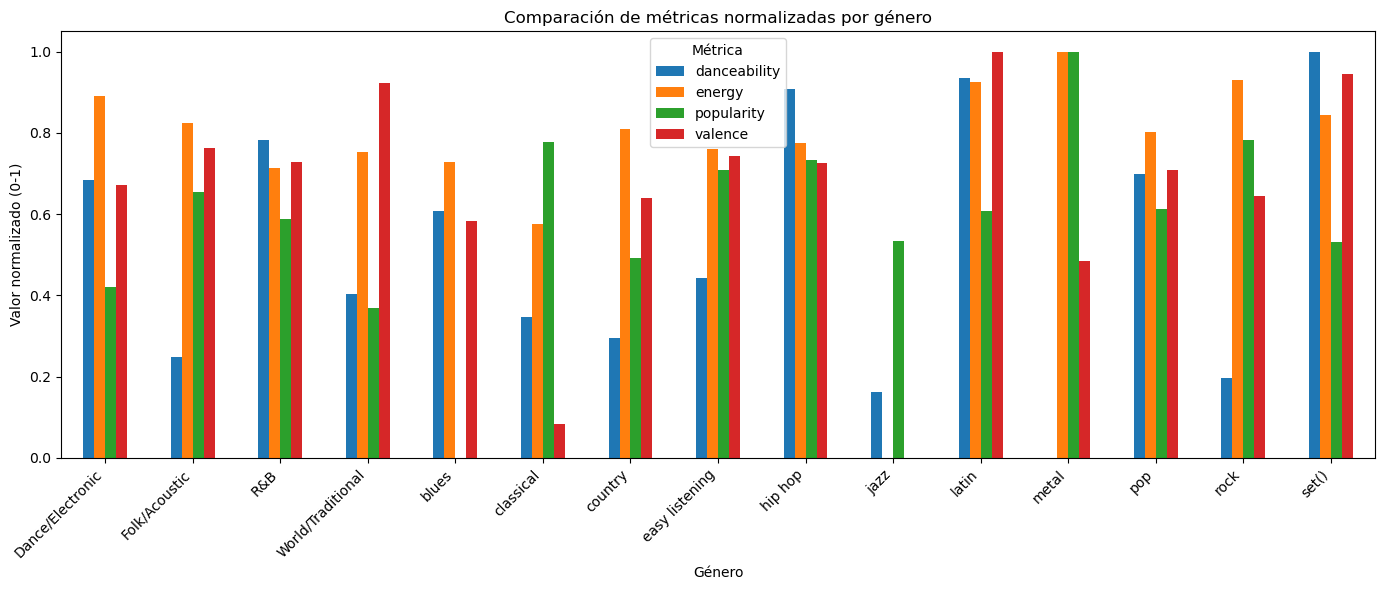

In [24]:
import matplotlib.pyplot as plt

# Normalizamos todas las métricas para que estén en el rango 0-1
genre_metrics_normalized = (genre_metrics_avg - genre_metrics_avg.min()) / (genre_metrics_avg.max() - genre_metrics_avg.min())

# Gráfico de barras comparando las métricas normalizadas por género
plt.figure(figsize=(14,6))
genre_metrics_normalized.plot(kind='bar', figsize=(14,6))
plt.title("Comparación de métricas normalizadas por género")
plt.ylabel("Valor normalizado (0-1)")
plt.xlabel("Género")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Métrica")
plt.tight_layout()
plt.show()


### Gráfico comparativo de métricas normalizadas por género

En la celda anterior hemos mostrado un gráfico de barras en el que todas las métricas (`danceability`, `energy`, `valence` y `popularity`) se normalizan entre 0 y 1.  
Esto nos permite comparar visualmente todas las métricas en la misma escala, evitando que `popularity` domine el gráfico debido a su rango mucho mayor (0-100) en comparación con las otras métricas (0-1).  


### Análisis de la relación entre género, duración y popularidad:
Vamos a trabajar sobre la relación entre género, duración y popularidad para detectar patrones más sutiles. Este análisis nos ayudará a comprender cómo estos factores interactúan entre sí y con otros atributos de las canciones.

1. Distribución de la duración según el género
2. Distribución de la popularidad según el género
3. Relación entre duración y popularidad por género
4. Análisis de tendencias a través de las métricas

### 1. Distribución de la duración promedio de las canciones por género

En este paso, vamos a analizar cómo varía la duración promedio de las canciones dependiendo del género. Esto nos ayudará a observar si ciertos géneros tienden a tener canciones más largas o más cortas. Para ello, vamos a generar un gráfico de barras horizontal.


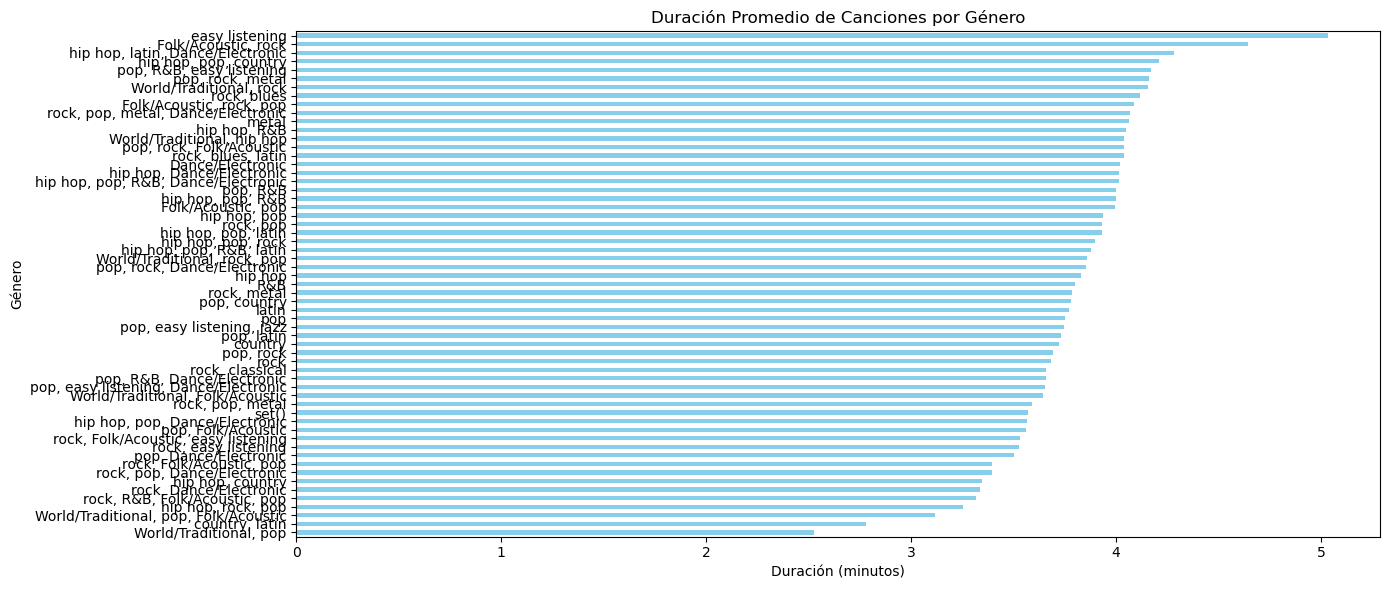

In [28]:
# Gráfico de duración promedio por género
plt.figure(figsize=(14, 6))
genre_duration_avg = df_clean.groupby('genre')['duration_min'].mean().sort_values()
genre_duration_avg.plot(kind='barh', color='skyblue')
plt.title("Duración Promedio de Canciones por Género")
plt.xlabel("Duración (minutos)")
plt.ylabel("Género")
plt.tight_layout()
plt.show()


En este paso, la duración promedio de las canciones por género varía considerablemente. Algunos géneros tienen una duración promedio más alta, mientras que otros tienen una duración más corta. Aquí están algunas observaciones clave:

- Folk/Acoustic, rock tiene la duración promedio más alta, con alrededor de 4.64 minutos. Esto podría ser indicativo de canciones más complejas o estructuradas de manera más extensa, como es típico en ciertos subgéneros de folk o rock.

- World/Traditional, pop tiene la duración promedio más baja, con 2.53 minutos. Esto sugiere que este género está compuesto mayormente por canciones más cortas, lo que es común en música más comercial o pop.

- Easy listening también tiene una duración significativa (5.04 minutos), lo cual es coherente con la música de este estilo, que suele ser más relajante y menos centrada en la duración de los temas.

Patrón observado: Los géneros más comerciales y populares, como World/Traditional, pop, tienden a tener canciones más cortas, mientras que los géneros más complejos como Folk/Acoustic, rock tienen canciones de mayor duración.

### 2. Distribución de la popularidad promedio de las canciones por género

En este paso, vamos a observar cómo se distribuye la **popularidad promedio** de las canciones según el género. Esto nos permitirá identificar si hay géneros que tienden a ser más populares en promedio que otros. Para esto, generaremos otro gráfico de barras horizontal.


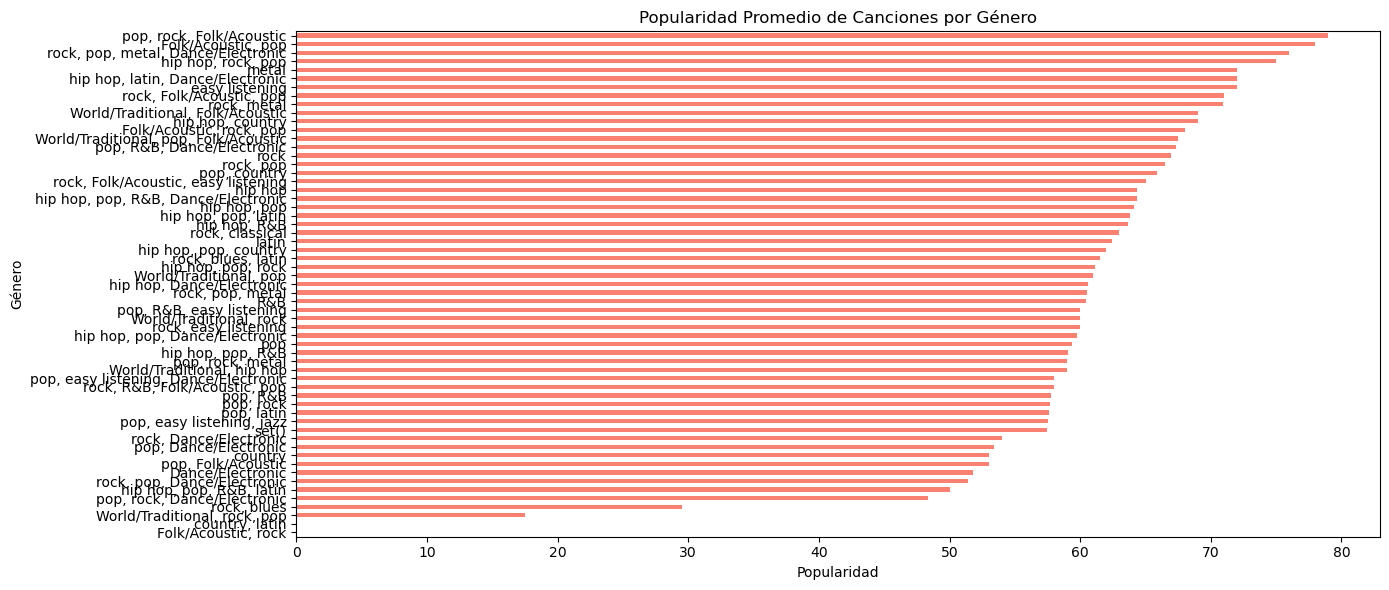

In [29]:
# Gráfico de popularidad promedio por género
plt.figure(figsize=(14, 6))
genre_popularity_avg = df_clean.groupby('genre')['popularity'].mean().sort_values()
genre_popularity_avg.plot(kind='barh', color='salmon')
plt.title("Popularidad Promedio de Canciones por Género")
plt.xlabel("Popularidad")
plt.ylabel("Género")
plt.tight_layout()
plt.show()


La popularidad promedio también varía ampliamente entre los géneros. Algunos géneros son más populares que otros. Las principales observaciones son:

- Folk/Acoustic, pop tiene la mayor popularidad promedio (78), lo que sugiere que este tipo de música es muy apreciado por los oyentes en general. Este género es conocido por ser accesible y pegajoso, lo que podría explicar su alta popularidad.

- Folk/Acoustic, rock tiene una popularidad de 0, lo que indica que este género es muy poco popular, o las canciones en este género no están muy presentes en las plataformas de música analizadas. Esto puede ser un caso de subgéneros muy específicos o nichos de mercado.

- R&B y hip hop tienen valores de popularidad bastante altos (alrededor de 60), lo que refleja su predominancia en las listas de música populares y el consumo generalizado en plataformas como Spotify.

- World/Traditional, pop tiene una popularidad de 61, lo que también lo coloca como un género relativamente popular.

Patrón observado: Géneros como Folk/Acoustic, pop y R&B tienden a ser más populares, mientras que los géneros más experimentales o tradicionales, como Folk/Acoustic, rock, tienen una popularidad mucho más baja.

### 3. Relación entre Duración y Popularidad por Género

En este paso, vamos a explorar la relación entre **duración** y **popularidad** para ver si existe alguna correlación. Utilizaremos un gráfico de dispersión donde se muestra cómo estas dos métricas varían para los diferentes géneros.


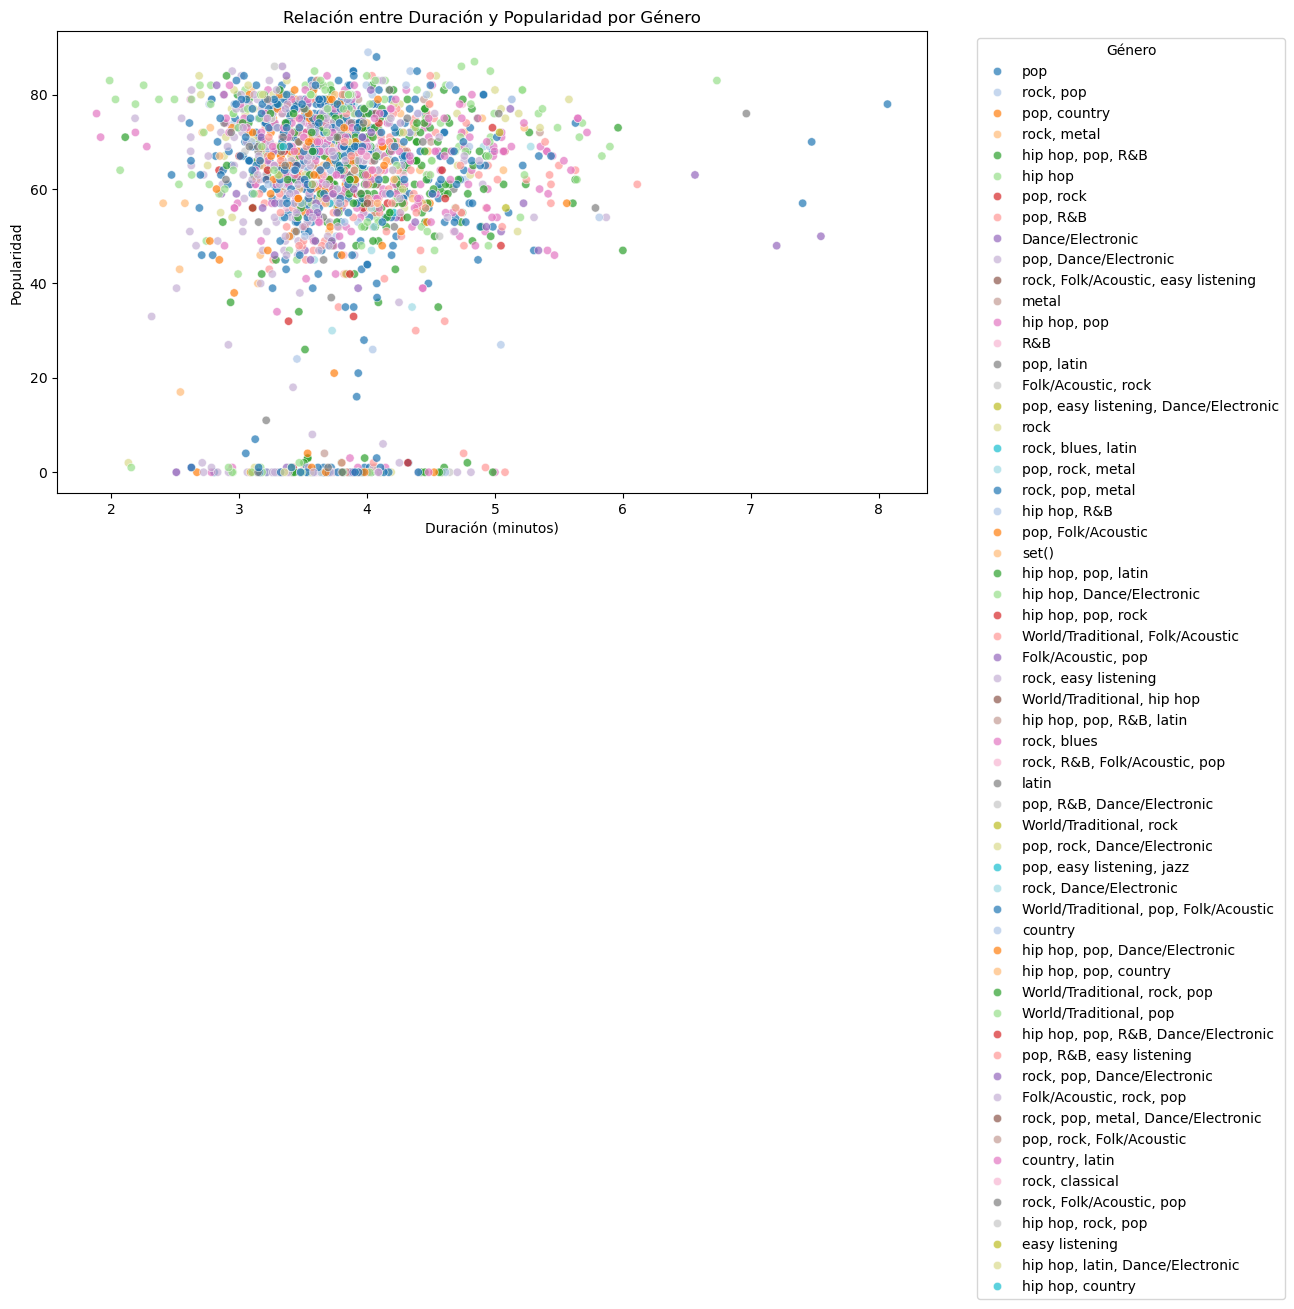

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de dispersión entre duración y popularidad, por género
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_clean, x='duration_min', y='popularity', hue='genre', palette='tab20', alpha=0.7)
plt.title("Relación entre Duración y Popularidad por Género")
plt.xlabel("Duración (minutos)")
plt.ylabel("Popularidad")
plt.legend(title="Género", bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar márgenes manualmente
plt.subplots_adjust(right=0.85)  # Esto ajusta el margen derecho

plt.show()


En este paso, estamos viendo una tabla que muestra tanto la duración promedio como la popularidad promedio de las canciones por género. Al observar estos datos, se pueden identificar ciertos patrones:

- Easy listening tiene una duración relativamente larga (5.04 minutos) y una popularidad alta (72), lo que sugiere que, aunque las canciones en este género sean más largas, siguen siendo populares entre los oyentes.

- Folk/Acoustic, rock, a pesar de tener una duración relativamente larga (4.64 minutos), tiene una popularidad muy baja (0). Esto subraya el hecho de que este género puede ser menos accesible para el público general, y su estilo puede estar orientado a una audiencia más reducida.

- Los géneros que mezclan varios estilos, como hip hop, Dance/Electronic (duración 4.01 minutos y popularidad 60.6) y hip hop, pop (duración 3.94 minutos y popularidad 64.1), tienen una combinación de una duración moderada y una popularidad alta, lo que refleja la tendencia a crear canciones que sean tanto pegajosas como relativamente accesibles.

Patrón observado: Los géneros que mezclan estilos tienden a tener un equilibrio entre duración y popularidad, mientras que los géneros más especializados tienen una relación más polarizada (duración larga pero baja popularidad, o duración corta con baja popularidad).

### 4. Análisis de Correlación entre Duración, Popularidad y Métricas Musicales

En este paso, exploraremos las correlaciones entre la **duración**, **popularidad** y otras métricas musicales como **danceability**, **energy** y **valence**. Esto nos permitirá ver si hay relaciones interesantes entre estas características, como si las canciones más largas tienden a ser más energéticas o populares.


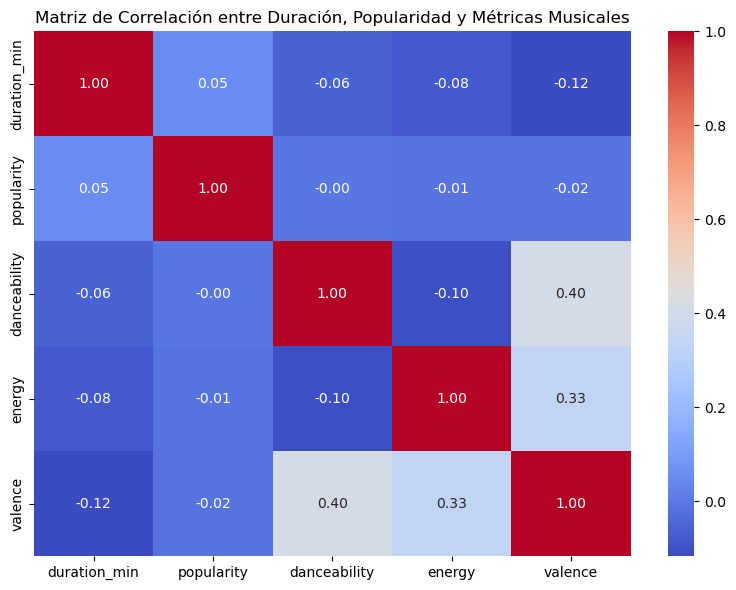

In [31]:
# Selección de columnas relevantes para el análisis de correlación
metrics_of_interest = ['duration_min', 'popularity', 'danceability', 'energy', 'valence']
correlation_matrix = df_clean[metrics_of_interest].corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación entre Duración, Popularidad y Métricas Musicales")
plt.tight_layout()
plt.show()


La correlación entre la duración de las canciones y su popularidad es muy baja, con un valor de 0.05. Esto sugiere que no hay una relación significativa entre la duración de la canción y su popularidad en esta base de datos. En otras palabras, las canciones más largas no son necesariamente más populares, ni las canciones más cortas son menos populares.

Este valor de correlación muy bajo también indica que otros factores podrían estar influyendo más en la popularidad que la duración. Esto es consistente con lo que hemos observado en los pasos anteriores: géneros populares no necesariamente tienen canciones más cortas, y viceversa.

Patrón observado: La duración de las canciones no parece ser un factor determinante en la popularidad. Otros elementos, como el estilo de música, los artistas o la promoción, probablemente tienen un impacto mayor.

# Informe Final del Proyecto: Análisis Exploratorio de Top Hits de Spotify (2000–2019)

## 1. Introducción

En este proyecto se ha realizado un **análisis exploratorio de un conjunto de datos compuesto por aproximadamente 2000 canciones que han sido Top Hits en Spotify entre los años 2000 y 2019**.  
El dataset incluye diversas **características musicales**, información de **género**, **duración**, **popularidad** y métricas acústicas como *danceability*, *energy* y *valence*.

El objetivo principal ha sido **analizar la relación entre el género musical, la duración, la popularidad y las métricas musicales**, con el fin de identificar patrones relevantes dentro de canciones que han tenido éxito comercial en Spotify.  
Es importante destacar que, al tratarse de *Top Hits*, el dataset **no representa el catálogo completo de Spotify**, sino una muestra sesgada hacia canciones con alto nivel de difusión y consumo.

Adicionalmente, el proyecto ha tenido como meta trabajar con **datos estructurados y exportarlos en formato JSON**, sentando las bases para futuras extensiones como bases de datos o APIs.

---

## 2. Procesamiento y Preparación de los Datos

El análisis comenzó con la **carga y exploración inicial del dataset**, verificando dimensiones, tipos de datos y valores nulos. El conjunto de datos contiene **2000 canciones y 18 columnas**, sin valores faltantes, lo que permitió centrarse directamente en el análisis exploratorio.

Los principales pasos de preparación fueron:

- Conversión de la duración de las canciones de milisegundos a minutos (`duration_min`) para facilitar la interpretación.
- Transformación de variables categóricas:
  - `explicit` se convirtió a formato numérico (0/1).
  - `mode` y `key` se trataron como variables categóricas.
- Procesamiento de la columna `genre`, separando los múltiples géneros asociados a una canción en una lista (`genre_list`), lo que permitió analizar géneros individuales.
- Creación de DataFrames agregados por género con métricas promedio.
- Normalización de métricas (`danceability`, `energy`, `valence` y `popularity`) para permitir comparaciones visuales en una misma escala.

---

## 3. Análisis Exploratorio y Resultados Clave

### 3.1 Distribución de Popularidad y Duración

- La **popularidad** muestra una fuerte concentración en valores medios-altos (aproximadamente entre 55 y 80), lo cual es coherente con el hecho de que el dataset esté compuesto por canciones exitosas.
- La **duración de las canciones** se concentra principalmente entre **3 y 4,5 minutos**, con un pico alrededor de los 3,5 minutos, reflejando el formato estándar de la música comercial.
- Las canciones con duraciones superiores a los 6 minutos son poco frecuentes y suelen asociarse a géneros más específicos o menos orientados al consumo masivo.

---

### 3.2 Relación entre Duración y Popularidad

- El análisis mediante un gráfico de dispersión muestra que **no existe una relación lineal clara** entre duración y popularidad.
- La **correlación calculada (~0.05)** confirma que la duración de una canción **no es un factor determinante de su popularidad**, incluso dentro de un conjunto de canciones exitosas.
- Aunque la mayoría de los Top Hits tienen una duración media, esto parece responder más a **estándares de la industria musical** que a una relación directa con el éxito.

---

### 3.3 Distribución y Comportamiento por Género Musical

- El dataset está dominado por géneros como **Pop, Hip hop, R&B y Dance/Electronic**, lo cual es consistente con los géneros más consumidos en Spotify durante el periodo analizado.
- Géneros como **Jazz, Classical, Blues o Easy Listening** están poco representados, lo que debe interpretarse como una consecuencia del enfoque en Top Hits.
- En términos de duración:
  - **Classical y Jazz** presentan duraciones promedio más largas (alrededor de 5–5,5 minutos).
  - **Hip hop, Latin y Pop** tienden a tener canciones más cortas (3–3,6 minutos).
- En términos de popularidad:
  - Géneros como **Pop, Hip hop, R&B y Rock** muestran valores de popularidad promedio elevados.
  - Géneros más tradicionales o de nicho presentan popularidades más bajas incluso dentro de este subconjunto de canciones exitosas.

---

### 3.4 Métricas Musicales por Género

El análisis de métricas musicales promedio revela patrones consistentes con la identidad sonora de cada género:

- **Danceability**:
  - Alta en *Hip hop, Latin y Dance/Electronic*.
  - Baja en *Metal, Rock y Jazz*.
- **Energy**:
  - Muy alta en *Metal* y *Rock*.
  - Baja en *Jazz* y *Classical*.
- **Valence (positividad)**:
  - Alta en *Latin* y *World/Traditional*.
  - Baja en *Classical* y *Jazz*.
- **Popularidad**:
  - No siempre coincide con valores altos de *danceability* o *energy*, lo que indica que el éxito no depende de una única característica musical.

La normalización de las métricas permitió observar que **los géneros más bailables o energéticos no son necesariamente los más populares**, incluso dentro de un conjunto de canciones exitosas.

---

### 3.5 Análisis de Correlación entre Métricas Musicales

La matriz de correlación entre `danceability`, `energy`, `valence`, `popularity` y `duration_min` muestra que:

- Existe una **correlación moderada positiva** entre:
  - `danceability` y `valence`
  - `energy` y `valence`
- La **popularidad presenta correlaciones muy bajas** con el resto de métricas musicales.
- La duración tampoco muestra relaciones fuertes con ninguna métrica.

Esto refuerza la idea de que **la popularidad no puede explicarse únicamente mediante métricas musicales cuantitativas**, incluso cuando se analiza un conjunto de canciones que ya han sido exitosas.

---

## 4. Conclusiones

A partir del análisis realizado, se pueden extraer las siguientes conclusiones:

- La **duración de una canción no determina su popularidad**, ni siquiera dentro de un conjunto de Top Hits.
- Los géneros musicales presentan **identidades acústicas claras**, pero estas no se traducen directamente en mayores niveles de éxito.
- Géneros muy energéticos o bailables no son necesariamente los más populares, y géneros con métricas más moderadas pueden alcanzar altos niveles de popularidad.
- La popularidad parece ser un fenómeno **multifactorial**, influido por elementos que van más allá de las características musicales medidas, como el artista, el contexto cultural, las tendencias temporales o la promoción.

En conjunto, este proyecto demuestra cómo el análisis exploratorio permite **cuestionar suposiciones comunes** y ofrece una visión más realista del éxito musical en plataformas de streaming, especialmente cuando se trabaja con datasets sesgados hacia canciones populares.

---

## 5. Extensiones Futuras

Este proyecto puede ampliarse de múltiples maneras:

1. **Análisis temporal**, estudiando la evolución de las métricas musicales entre 2000 y 2019.
2. **Almacenamiento en bases de datos SQL** (SQLite, MySQL o PostgreSQL) para facilitar consultas complejas.
3. **Desarrollo de una API** con Flask o FastAPI para consultar métricas por género o año.
4. Aplicación de **modelos de machine learning** para intentar predecir popularidad a partir de características musicales.
5. Ampliar el dataset con canciones no necesariamente exitosas para comparar Top Hits frente al catálogo general.

Este análisis sienta una base sólida para continuar explorando la relación entre música, géneros y popularidad en plataformas de streaming.
